# TSF Intern Name : P Dhanush

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
import seaborn as sb
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
url = 'SampleSuperstore.csv'
ss_df = pd.read_csv(url)
ss_df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Dimensions of the data set

In [3]:
ss_df.shape

(9994, 13)

### Summary of dataset

In [4]:
ss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Checking null values

In [5]:
ss_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Description of Dataset

In [6]:
ss_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Number of values in each column

In [7]:
for i in ss_df.columns:
    print('Number of values in '+i+' :'+str(len(ss_df[i].value_counts())))

Number of values in Ship Mode :4
Number of values in Segment :3
Number of values in Country :1
Number of values in City :531
Number of values in State :49
Number of values in Postal Code :631
Number of values in Region :4
Number of values in Category :3
Number of values in Sub-Category :17
Number of values in Sales :5825
Number of values in Quantity :14
Number of values in Discount :12
Number of values in Profit :7287


### Seperating Categorical columns and numerical columns based on above classification

In [8]:
cat_col = ['Ship Mode','Segment','City','State','Region','Category','Sub-Category']
num_col = ['Postal Code','Sales','Quantity','Discount','Profit']

#### I am removing Country column as it is useless because it contains only 'United states for all'.

In [9]:
print('Number of Unique values in Country '+str(len(ss_df['Country'].unique()))+' and that is '+ str(ss_df['Country'].unique()[0])+'.')
ss_df = ss_df.drop(['Country'],axis = 1)
ss_df.head()

Number of Unique values in Country 1 and that is United States.


,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Univariate analysis on categorical columns

### Bar plot and countplot

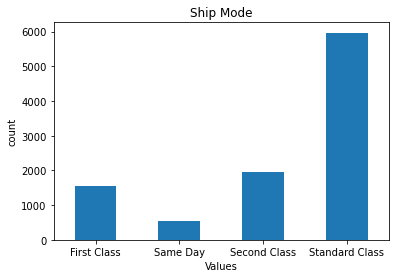

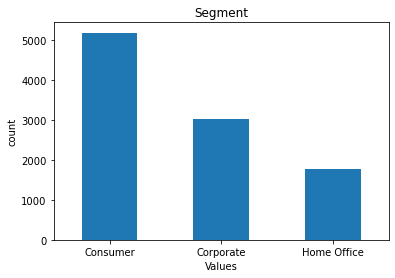

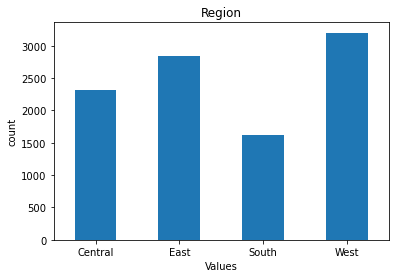

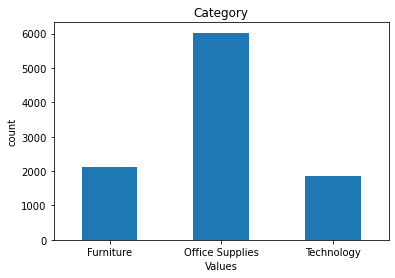

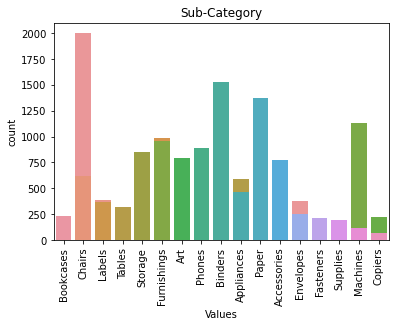

In [10]:
for col in cat_col:
    if len(ss_df[col].value_counts())<=10:
        ss_df[col].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
        plt.title(col)
        plt.xlabel('Values')
        plt.show()
for col in cat_col:
    if len(ss_df[col].value_counts())>10:
        ax = sb.countplot(x=col, data=ss_df)
        plt.title(col)
        plt.xlabel("Values")
        plt.xticks(rotation =90)

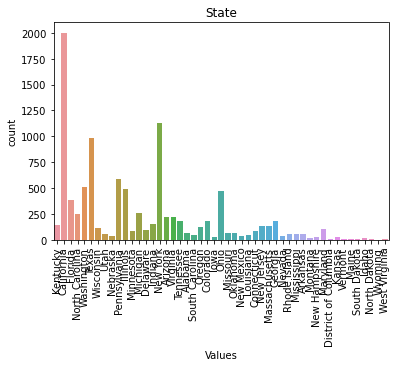

In [30]:
sb.countplot(x='State', data=ss_df)
plt.title('State')
plt.xlabel('Values')
plt.xticks(rotation=90)
plt.show()

### Boxplot

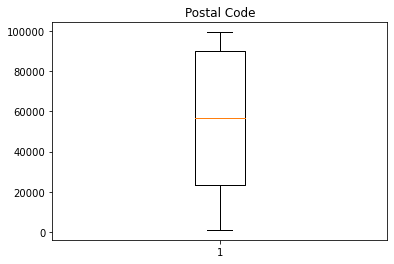

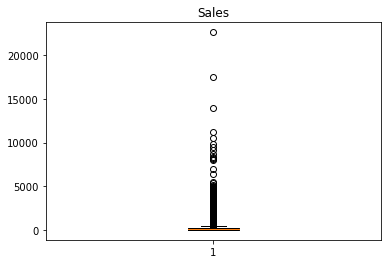

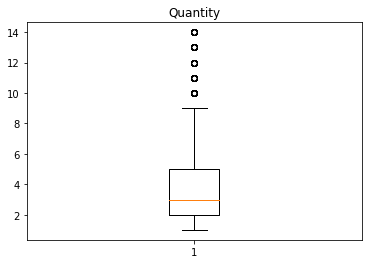

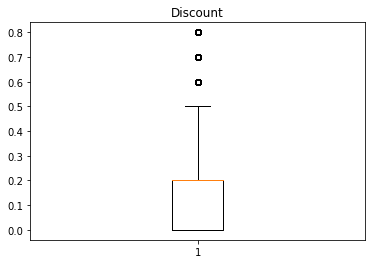

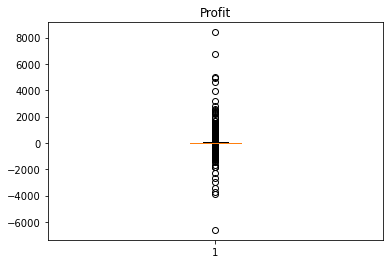

In [11]:
for i in num_col:
    plt.boxplot(ss_df[i])
    plt.title(i)
    plt.show()

### Univariate analysis on numerical columns

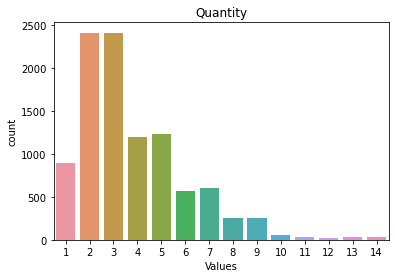

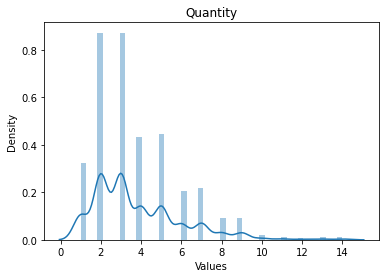

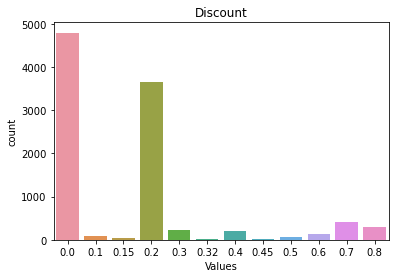

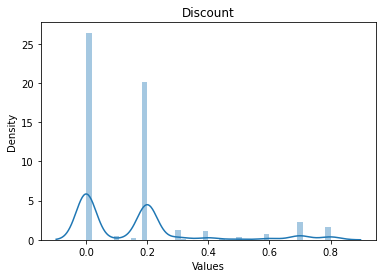

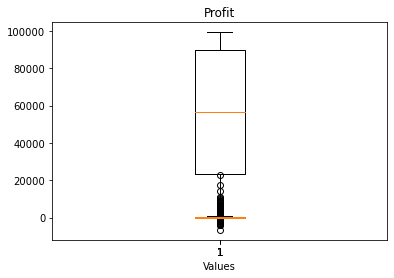

In [12]:
for col in num_col:
    if len(ss_df[col].value_counts())<20:
        ax1 = sb.countplot(x=col, data=ss_df)
        plt.title(col)
        plt.xlabel("Values")
        #plt.xticks(rotation =90)
        plt.show()
        ax2 = sb.distplot(ss_df[col])
        plt.title(col)
        plt.xlabel("Values")
        #plt.xticks(rotation =90)
        plt.show()
for col in num_col:
    if len(ss_df[col].value_counts())>10:
        plt.boxplot(ss_df[col])
        plt.title(col)
        plt.xlabel("Values")

### Bivariate analysis

In [ ]:
### Label Encoding

In [36]:
# le = preprocessing.LabelEncoder()
# for i in cat_col:
#     le.fit(ss_df[i])
#     ss_df[i] = le.transform(ss_df[i])
# ss_df

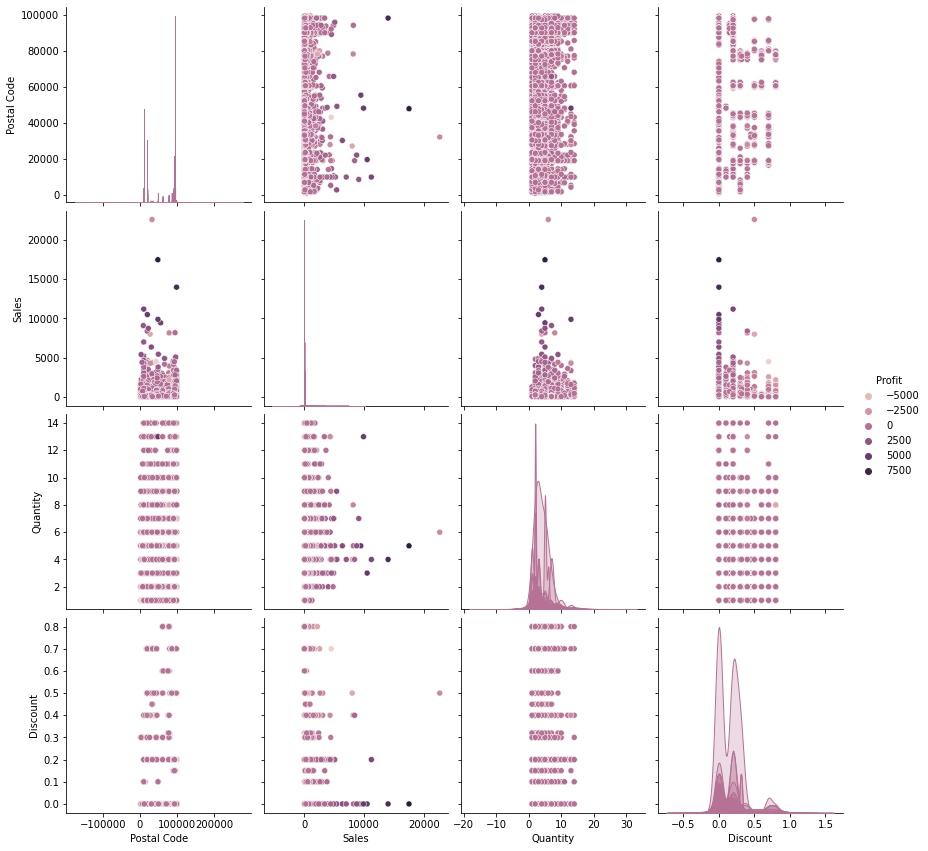

In [13]:
sb.pairplot(ss_df,hue='Profit',size=3)
plt.show()

In [14]:
corr = ss_df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

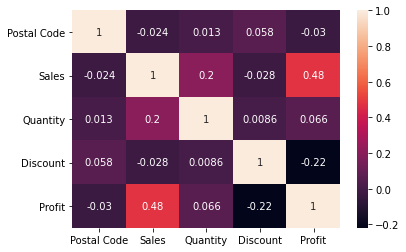

In [15]:
sb.heatmap(corr,annot=True)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

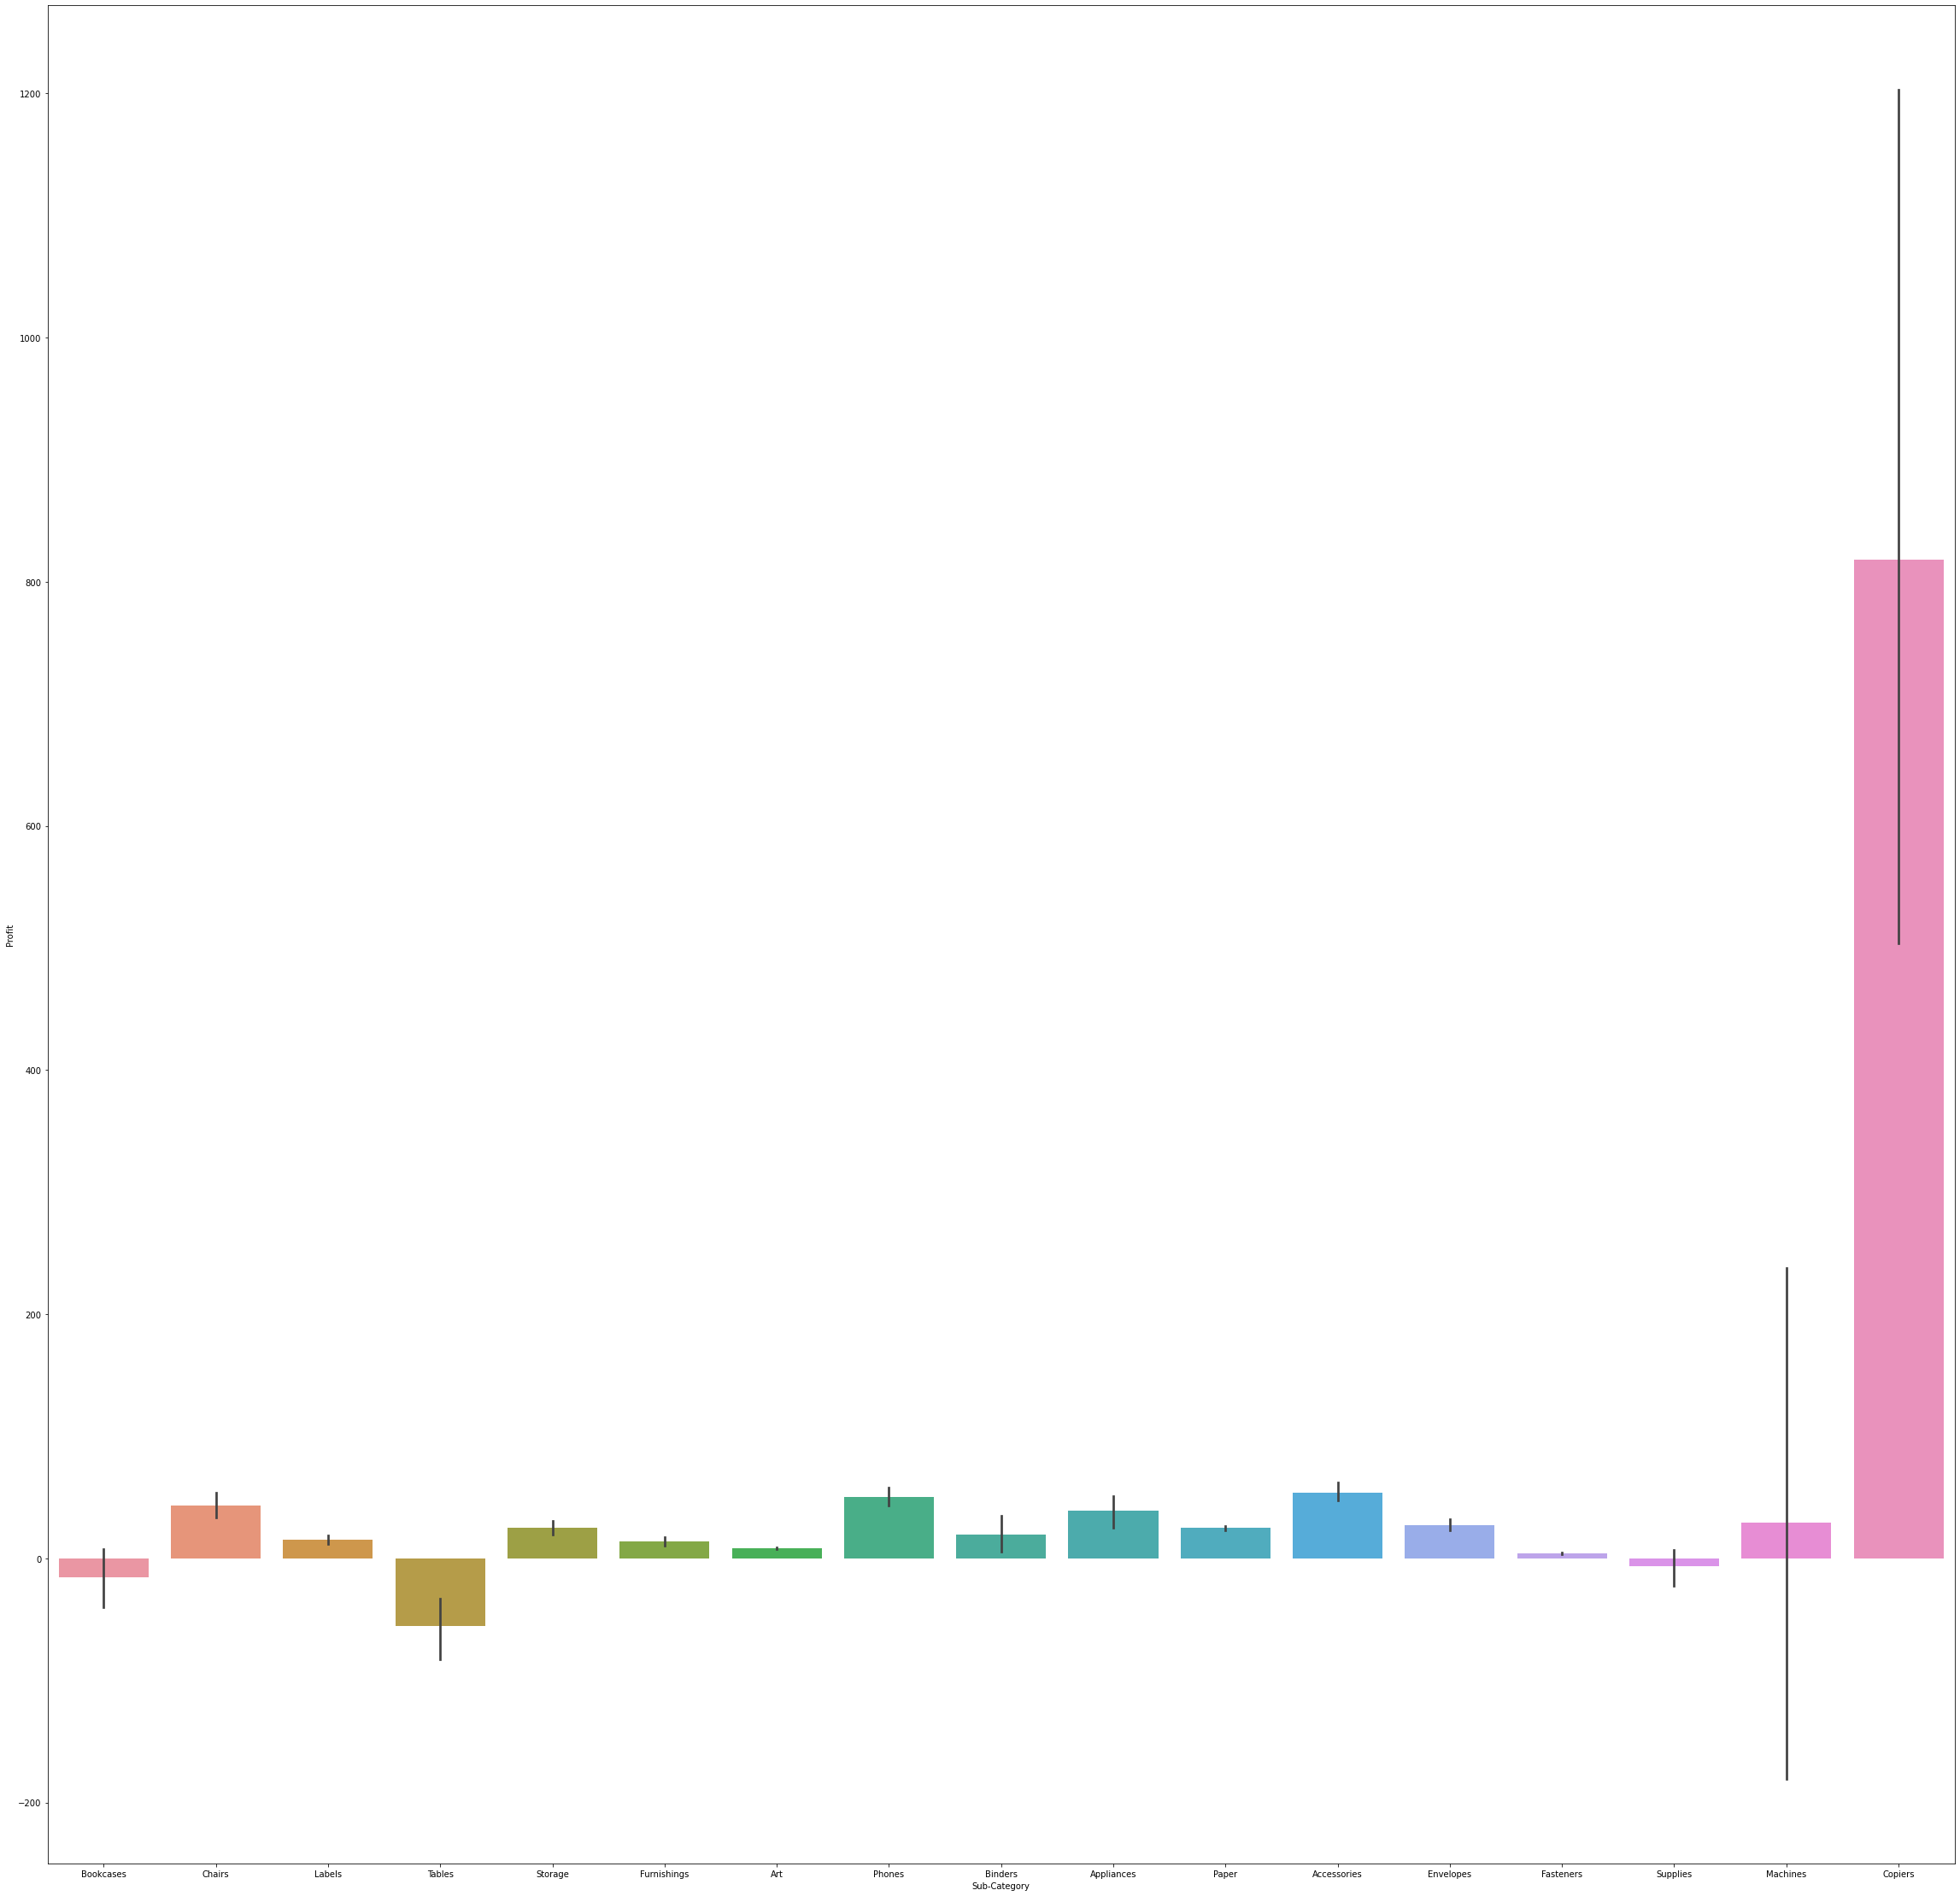

In [16]:
plt.figure(figsize = (40,40))
sb.barplot(x=ss_df['Sub-Category'], y=ss_df['Profit'])

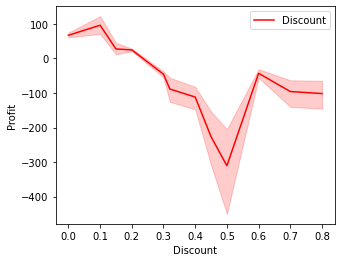

In [17]:
plt.figure(figsize = (5,4))
sb.lineplot('Discount', 'Profit', data = ss_df, color = 'r', label= 'Discount')
plt.legend()